In [1]:
from vivarium_csu_hypertension_sdc.verification_and_validation.simulant_trajectory_visualizer import SimulantTrajectoryVisualizer

In [2]:
result_dir = '/share/costeffectiveness/results/vivarium_csu_hypertension_sdc/sample_history/'
vis = SimulantTrajectoryVisualizer(result_dir, 'hypothetical_baseline.hdf')

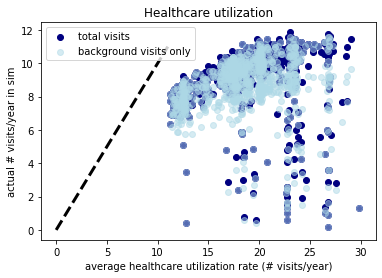

In [4]:
vis.visualize_healthcare_utilization()

interactive(children=(IntSlider(value=500, description='simulant', max=1000, min=1), Checkbox(value=True, desc…

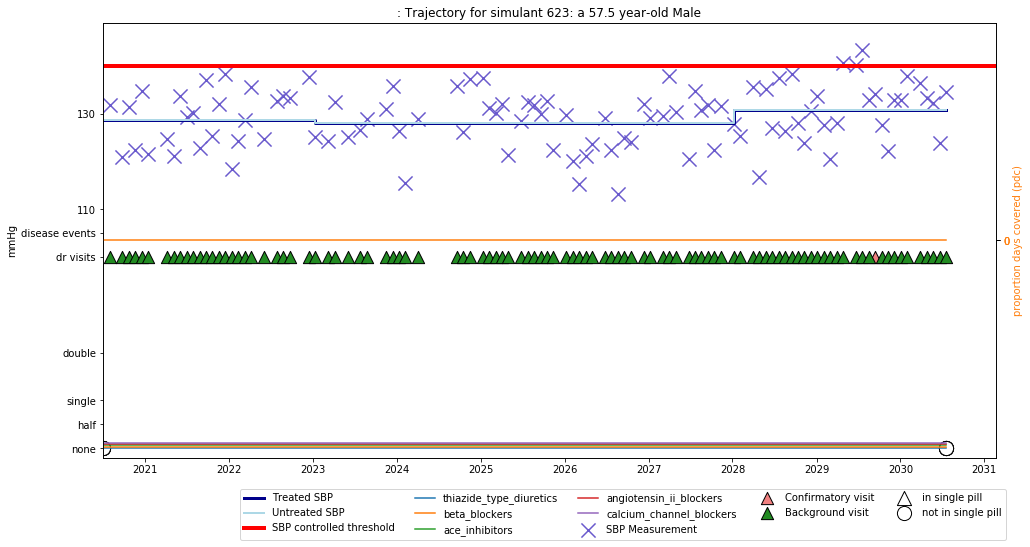

In [3]:
vis.visualize_simulant_trajectory()

In [1]:
from vivarium import Artifact

In [2]:
a = Artifact('/share/costeffectiveness/artifacts/vivarium_csu_hypertension_sdc/mexico.hdf')

In [3]:
print(a)

Artifact containing the following keys:
metadata
	keyspace
	locations
population
	structure
	age_bins
	theoretical_minimum_risk_life_expectancy
	demographic_dimensions
cause
	all_causes
		cause_specific_mortality_rate
	ischemic_heart_disease
		sequelae
		restrictions
		cause_specific_mortality_rate
		incidence_rate
	ischemic_stroke
		sequelae
		restrictions
		cause_specific_mortality_rate
		incidence_rate
	subarachnoid_hemorrhage
		sequelae
		restrictions
		cause_specific_mortality_rate
		incidence_rate
	intracerebral_hemorrhage
		sequelae
		restrictions
		cause_specific_mortality_rate
		incidence_rate
	chronic_kidney_disease
		restrictions
		cause_specific_mortality_rate
		prevalence
		disability_weight
		excess_mortality_rate
		incidence_rate
sequela
	acute_myocardial_infarction
		prevalence
		disability_weight
		excess_mortality_rate
	post_myocardial_infarction
		prevalence
		disability_weight
		excess_mortality_rate
	acute_ischemic_stroke
		prevalence
		disability_weight
		excess_m

In [5]:
df = a.load('healthcare_entity.outpatient_visits.utilization_rate')
df = df.loc[('Mexico')]
df = df.xs(2017, level='year_start').reset_index().drop(columns=['age_end', 'year_end']).set_index(['sex', 'age_start'])
df = df.stack().reset_index().rename(columns={'age_start': 'age_group', 'level_2': 'draw', 0: 'value'})

In [6]:
%matplotlib inline
import seaborn as sns

[Text(0, 0, '0.0'),
 Text(1, 0, '0.01917808'),
 Text(2, 0, '0.07671233'),
 Text(3, 0, '1.0'),
 Text(4, 0, '5.0'),
 Text(5, 0, '10.0'),
 Text(6, 0, '15.0'),
 Text(7, 0, '20.0'),
 Text(8, 0, '25.0'),
 Text(9, 0, '30.0'),
 Text(10, 0, '35.0'),
 Text(11, 0, '40.0'),
 Text(12, 0, '45.0'),
 Text(13, 0, '50.0'),
 Text(14, 0, '55.0'),
 Text(15, 0, '60.0'),
 Text(16, 0, '65.0'),
 Text(17, 0, '70.0'),
 Text(18, 0, '75.0'),
 Text(19, 0, '80.0'),
 Text(20, 0, '85.0'),
 Text(21, 0, '90.0'),
 Text(22, 0, '95.0')]

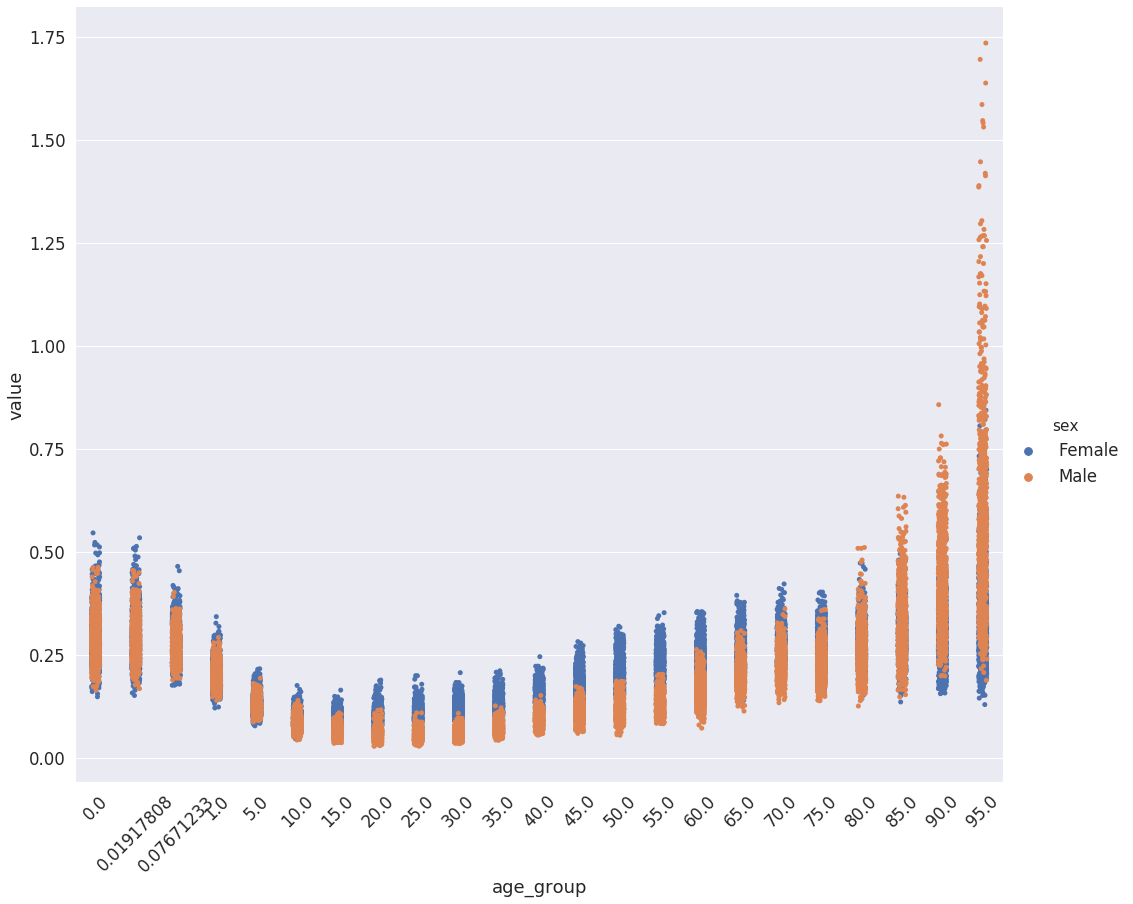

In [7]:
sns.set(font_scale=1.5)
g = sns.catplot(x='age_group', y='value', hue='sex', data=df, height=12, aspect=1.2)
g.ax.set_xticklabels(g.ax.get_xticklabels(), rotation=45)